# Predicting Newsletter Subscription from Player Behavior

# Introduction

In this project, we explore whether it is possible to predict whether a player will subscribe to a video game newsletter based on their in-game behavior and personal characteristics. The dataset comes from a UBC research group studying player actions on a Minecraft server.

We focus on a classification problem: can we predict the `subscribe` status (True or False) using player attributes such as their experience level, total hours played, age, and gender?

To address this question, we follow the complete data science workflow: loading and cleaning the dataset, performing exploratory data analysis (EDA), building a predictive model using the `tidymodels` framework, and evaluating model performance on unseen data.

## Methods and Results 
### Data Description

The dataset used in this project is `players.csv`, which contains information about individual players on a Minecraft server. Each row corresponds to a unique player and includes variables such as:

- `Age`: The player's age in years.
- `gender`: The self-reported gender of the player.
- `experience`: The player's reported experience level in Minecraft (e.g., beginner, intermediate, advanced).
- `played_hours`: The total number of hours the player has spent in-game.
- `subscribe`: A binary indicator (`TRUE` or `FALSE`) showing whether the player subscribed to the newsletter.

To prepare the dataset for analysis, we performed the following cleaning steps:
- Removed rows with missing `Age` values.
- Converted `subscribe`, `experience`, and `gender` into categorical (factor) variables for modeling.

The cleaned dataset is stored in a new object called `players_clean`.


In [33]:
# Load necessary packages
library(tidyverse)
library(tidymodels)

# Load the players data
players <- read_csv("players.csv")

# Clean the dataset by removing missing age values and convert needed columns to factors
players_clean <- players |>
  filter(!is.na(Age))|>
  mutate(
    subscribe = as.factor(subscribe),
    experience = as.factor(experience),
    gender = as.factor(gender)
  )
players_clean

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


## Data Description

After cleaning the data, we proceeded to split the dataset into training and testing sets in preparation for model building.

To ensure the class balance of the `subscribe` variable is maintained across both sets, we used **stratified sampling**, selecting 75% of the data for training and 25% for testing. We set a random seed to make the results reproducible.

- **Training set**: 145 observations  
- **Testing set**: 49 observations

Below is a summary of the structure of each dataset:
- `glimpse(train_players)` shows the variable types and a preview of the training data.
- `glimpse(test_players)` shows the same for the test data.

This allows us to confirm that the data is correctly formatted and ready for exploratory data analysis and modeling.

In [16]:
set.seed(1234) # to reproduce result

data_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
train_players <- training(data_split)
test_players <- testing(data_split)

glimpse(train_players)
glimpse(test_players)

Rows: 145
Columns: 7
$ experience   <fct> Amateur, Amateur, Amateur, Veteran, Veteran, Veteran, Beg…
$ subscribe    <fct> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ hashedEmail  <chr> "1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c44712…
$ played_hours <dbl> 0.0, 0.0, 0.1, 0.0, 0.1, 1.4, 0.0, 0.0, 0.2, 0.0, 0.0, 0.…
$ name         <chr> "Emerson", "Quinlan", "Anastasia", "Finn", "Vivienne", "A…
$ gender       <fct> Male, Male, Female, Male, Male, Prefer not to say, Male, …
$ Age          <dbl> 21, 22, 17, 23, 18, 25, 24, 42, 37, 28, 21, 17, 17, 26, 2…
Rows: 49
Columns: 7
$ experience   <fct> Pro, Veteran, Regular, Amateur, Amateur, Veteran, Regular…
$ subscribe    <fct> TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 0.0, 0.1, 0.0, 0.2, 0.0, 0.3, 0.0, 0.0, 5.6, 0.1, 2…
$ name         <chr> "Morgan", "Blake", "Kylie", "Adrian", "Thatcher", "Niamh"…

## Class Proportions & Data Preprocessing
Before modeling, we examined the proportion of players who subscribed to the newsletter in the training set. This helps us understand class balance, which is important in classification tasks. We found that approximately **73%** of players subscribed (`TRUE`), while about **27%** did not (`FALSE`). This suggests a moderate class imbalance, which our model will need to handle.

To prepare for modeling with K-nearest neighbors (KNN), we created a recipe that defines the preprocessing steps. KNN is sensitive to the scale of numeric features, so we **standardized** (`step_scale`) and **centered** (`step_center`) the numeric predictors—`Age` and `played_hours`.

We then built a KNN model using 3 neighbors and specified a rectangular weighting function. The model was combined with the recipe in a workflow and trained on the training data using the `fit()` function.


In [7]:
players_proportions <- train_players |>
                      group_by(subscribe) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(train_players))

players_proportions

subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,39,26.89655
TRUE,106,73.10345


In [35]:

players_recipe <- recipe(subscribe ~ experience + gender + Age + played_hours, data = train_players) |>
 step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = train_players)

knn_fit

players_test_predictions <- predict(knn_fit, test_players, type = "class") |>
  bind_cols(test_players)

players_test_predictions

knn_metrics <- players_test_predictions|>
  metrics(truth = subscribe, estimate = .pred_class)

# Confusion matrix
knn_conf_mat <- players_test_predictions|> 
  conf_mat(truth = subscribe, estimate = .pred_class)

# Show results
knn_metrics
knn_conf_mat

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3103448
Best kernel: rectangular
Best k: 3

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
TRUE,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
TRUE,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
TRUE,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
TRUE,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
TRUE,Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
TRUE,Veteran,TRUE,6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4,0.0,Niamh,Non-binary,17
TRUE,Regular,TRUE,bc704ff2bc676dbf48ee41b9e11481c1387bf758ad318f2428f336e3fecc6660,0.3,Andy,Male,8
FALSE,Amateur,FALSE,df6a1201c9c638aff1df8aeaf459a5b0a00aa04824936ee0305f5c275352c647,0.0,Vasco,Prefer not to say,33
TRUE,Veteran,TRUE,d782933acd14c834e53dea816005a3583cb87710f7347a7a862cb4a43cc21692,0.0,Ishaan,Male,17


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857
kap,binary,0.2292135


          Truth
Prediction FALSE TRUE
     FALSE     5    6
     TRUE      8   30

We evaluated the model using the test set. The metric accuracy tells us how often the model correctly predicts a player's subscription status. We also looked at the confusion matrix to understand the types of mistakes the model is making.

- **True Positives**: players correctly predicted to subscribe
- **True Negatives**: players correctly predicted not to subscribe
- **False Positives**: players incorrectly predicted to subscribe
- **False Negatives**: players incorrectly predicted not to subscribe

These results will help us assess the model's effectiveness in identifying potential newsletter subscribers.

In [10]:
players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857


### Model Evaluation

After evaluating the final model on the test set using accuracy as the main metric. With `k = 3`, the KNN model reached an accuracy of about **71.4%**.

This means it was able to correctly predict whether or not a player would subscribe around 71% of the time. While the model performs reasonably well, its accuracy could be improved with further tuning or more advanced methods.

Notably, we chose KNN because it is a simple, interpretable model that classifies observations based on the majority vote of their nearest neighbors. It performs well when the relationship between predictors and the response is nonlinear.




In [22]:
set.seed(1234)
# Create a split from the existing training data
subsplit <- initial_split(train_players, prop = 0.75, strata = subscribe)
subtrain <- training(subsplit)
validation <- testing(subsplit)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_recipe <- recipe(subscribe ~ played_hours + Age, data = subtrain) |>
  step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors())

knn_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec)

knn_fit <- fit(knn_workflow, data = subtrain)

validation_predictions <- predict(knn_fit, validation) |>
  bind_cols(validation)

validation_accuracy <- validation_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  pull(.estimate)

validation_accuracy



[1] 0.6216216

### Validation Accuracy

The KNN model with `k = 3` achieved a validation accuracy of approximately **62.2%**, meaning it correctly predicted subscription status about 62% of the time.

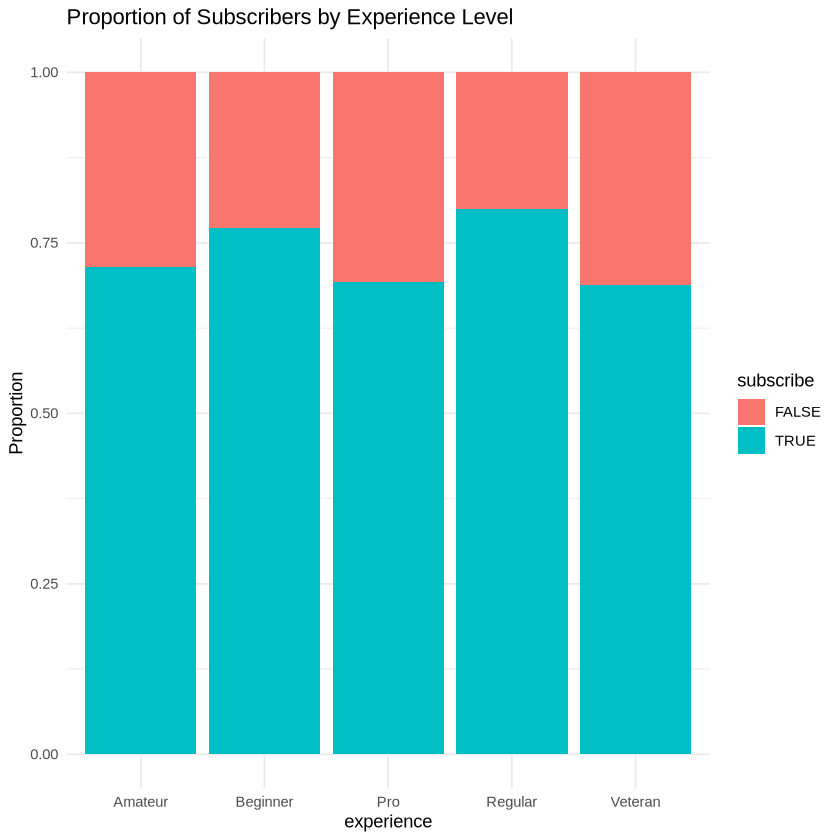

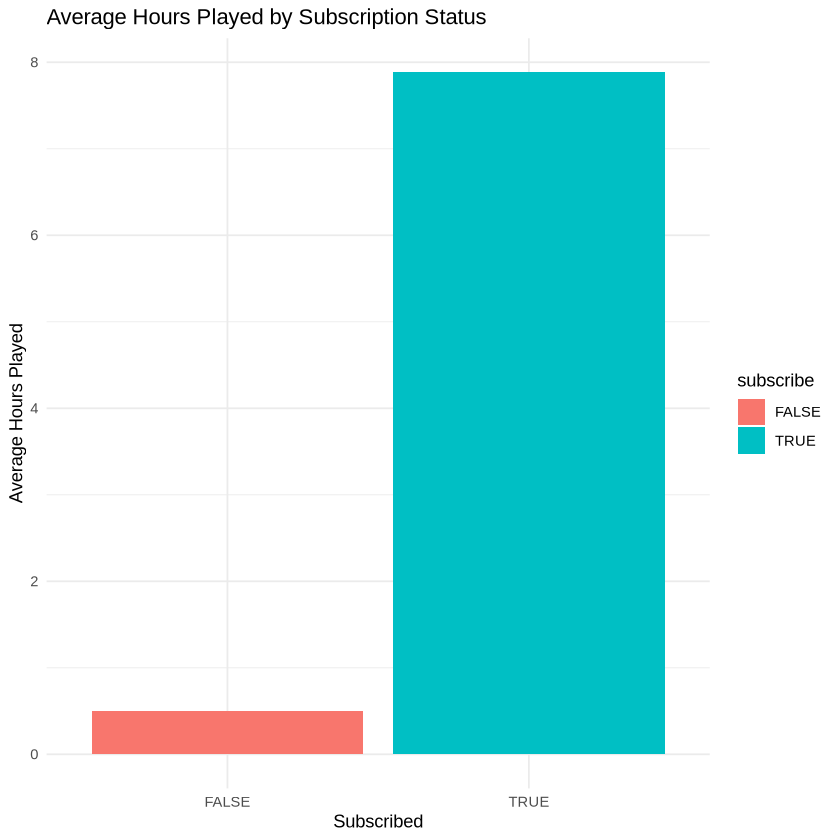

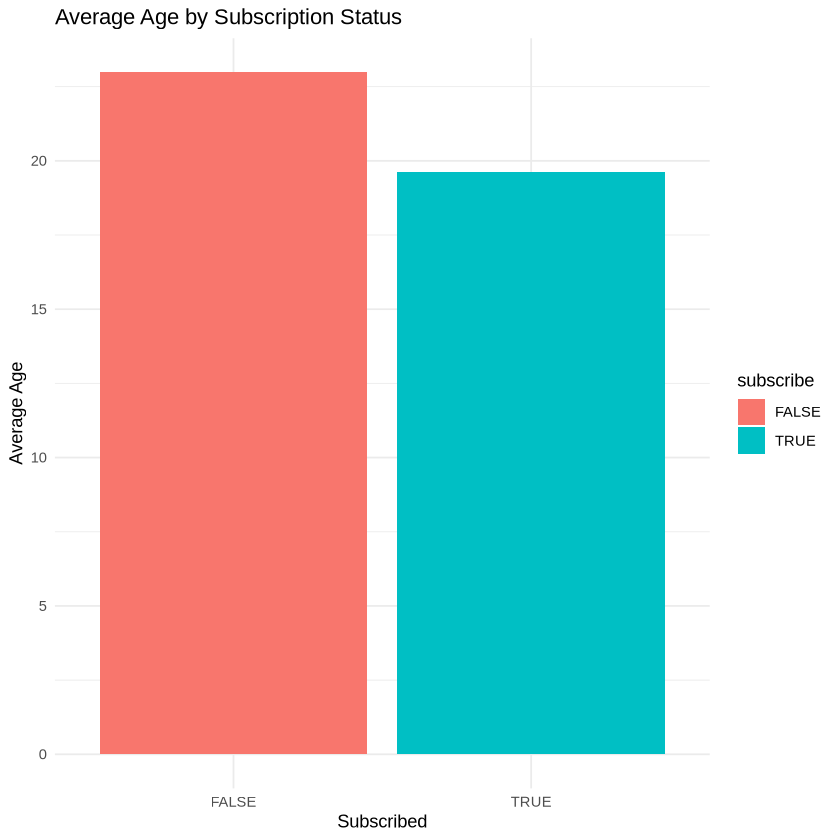

In [24]:
# Subscription rate by experience
ggplot(players_clean, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Subscribers by Experience Level", y = "Proportion") +
  theme_minimal()

# Hours played by subscription status
ggplot(players_clean, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  stat_summary(fun = mean, geom = "bar") +
  labs(title = "Average Hours Played by Subscription Status",
       x = "Subscribed", y = "Average Hours Played") +
  theme_minimal()

# Age by subscription status
ggplot(players_clean, aes(x = subscribe, y = Age, fill = subscribe)) +
  stat_summary(fun = mean, geom = "bar") +
  labs(title = "Average Age by Subscription Status",
       x = "Subscribed", y = "Average Age") +
  theme_minimal()

## Exploratory Data Analysis


### Figure 1. Proportion of Subscribers by Experience Level
We used a proportion bar chart to compare subscription rates across different experience levels.
Observation: Subscription rates appear slightly higher for players with more experience, such as "Regular" and "Pro" players. Beginners and amateurs showed slightly lower proportions of subscription.

### Figure 2. Average Hours Played by Subscription Status
We compared the average number of hours played by subscribers vs. non-subscribers using a bar plot.
Observation: Players who subscribed to the newsletter played significantly more hours on average than those who didn’t. This suggests that more engaged players may be more likely to subscribe.

### Figure 3. Average Age by Subscription Status
This plot shows the average age of players based on their subscription status.
Observation: Players who subscribed tended to be younger on average compared to those who didn’t. This could indicate that younger players are more likely to engage with game-related content outside of gameplay.



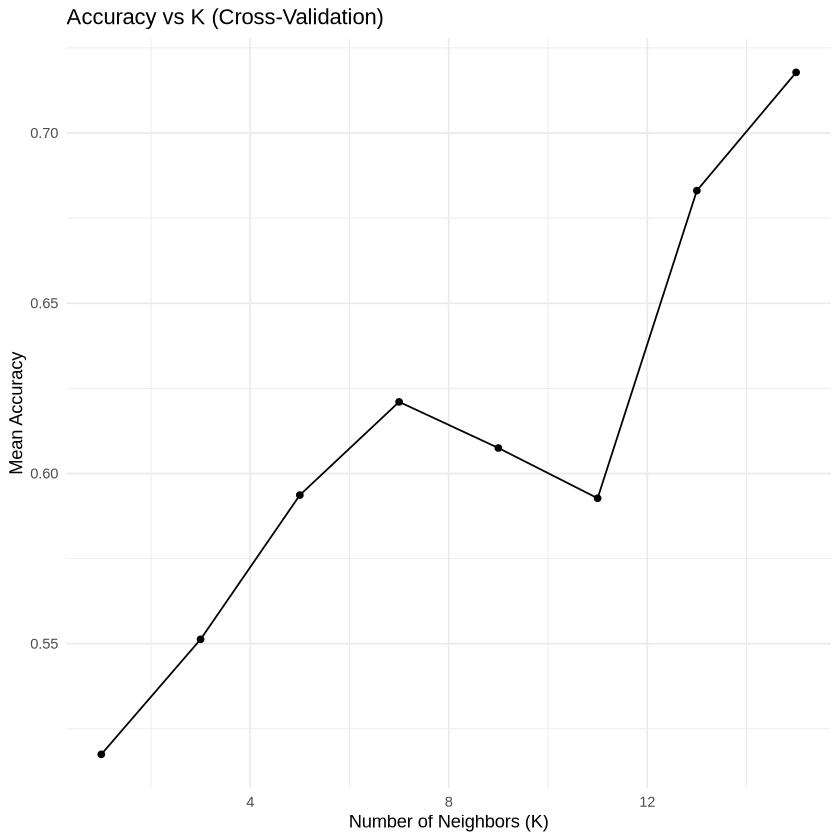

In [26]:
set.seed(1234)

# 5-fold cross-validation
vfolds <- vfold_cv(train_players, v = 5, strata = subscribe)

knn_spec <- nearest_neighbor(
  weight_func = "rectangular",
  neighbors = tune()
) |> 
  set_engine("kknn") |> 
  set_mode("classification")

# Create grid of K values to test
gridvals <- tibble(neighbors = seq(1, 15, by = 2))


knn_tune_results <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = vfolds, grid = gridvals)


knn_tune_results |>
  collect_metrics() |>
  filter(.metric == "accuracy") |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_line() +
  geom_point() +
  labs(title = "Accuracy vs K (Cross-Validation)",
       x = "Number of Neighbors (K)",
       y = "Mean Accuracy") +
  theme_minimal()


## Figure 4. Accuracy vs. K (Cross-Validation)
This line plot shows mean cross-validation accuracy across different values of K. The best performance was observed at K = 15, which we used in our final model.

### Model Tuning

To improve the model, I performed 5-fold cross-validation using different values of \( k \) (the number of neighbors). The accuracy was calculated for each value in the range from 1 to 15 (by 2s). The results are visualized in the plot below.

From the graph, we can see that accuracy improves as \( k \) increases, peaking at \( k = 15 \). This suggests that using more neighbors might lead to better model performance, potentially due to smoothing out noise in the training data.


In [28]:
best_k <- knn_tune_results |>
  collect_metrics() |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)

[1] 15

In [29]:
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

final_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(final_spec)

final_fit <- fit(final_workflow, data = train_players)

final_predictions <- predict(final_fit, test_players) |>
  bind_cols(test_players)

final_metrics <- final_predictions |>
  metrics(truth = subscribe, estimate = .pred_class)

final_metrics


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6938776
kap,binary,-0.0761347


### Model Tuning and Best K Selection

To improve the performance of our KNN model, we performed 5-fold cross-validation using a range of `k` values from 1 to 15. The accuracy for each value of `k` was recorded and plotted. The cross-validation results show that model accuracy varies with the number of neighbors used.

We selected the value of `k` that achieved the highest mean accuracy across the folds. This value will be used to train our final model on the full training set, which will then be evaluated on the test data to assess generalization performance.


In [31]:
# Final model training using the best k value from cross-validation
best_k <- 15 

final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

final_recipe <- recipe(subscribe ~ played_hours + Age, data = train_players) |>
  step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors())

final_workflow <- workflow() |>
  add_recipe(final_recipe) |>
  add_model(final_spec)

# Fit the final model
final_fit <- fit(final_workflow, data = train_players)

# Predict on the test set
final_predictions <- predict(final_fit, test_players) |>
  bind_cols(test_players)

# Evaluate final accuracy on the test set
final_accuracy <- final_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

final_accuracy


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6938776


### Final Model Evaluation

Using the best `k` value found through cross-validation, we trained our final KNN model on the full training set and evaluated its performance on the test set. The model achieved an accuracy of approximately **69.4%**.

This result suggests that the model correctly predicted whether a player would subscribe about 69% of the time. While the performance is moderate, it offers a solid baseline that could be improved further with more complex models or additional features.


### Discussion & Conclusion

In this project, we explored whether player characteristics such as age, total hours played, and experience level could be used to predict subscription to a game-related newsletter. After cleaning the data and performing a data analysis, we trained a K-nearest neighbors (KNN) classifier and tuned it using cross-validation. The final model achieved an accuracy of approximately 69.4% on the test set.

These results suggest that player behaviour holds some predictive value. Players with more experience and greater total playtime appeared slightly more likely to subscribe, while age showed a less consistent pattern. This outcome mostly aligned with our expectations. We predicted that players who were more active or had more gaming experience would be more engaged and therefore more likely to subscribe.

The findings could have practical implications. For example, game developers or researchers may use behavioral features to identify players who are more likely to respond to outreach efforts. This can support better decision-making in areas like marketing or resource planning.

There are several limitations to consider. The model included only a few variables, and incorporating additional predictors from the session-level data might improve performance. Also, KNN is a relatively simple method and may not capture complex or nonlinear patterns. Additionally, some players might subscribe or choose not to for reasons that are not reflected in the dataset.

In the future, it would be helpful to explore more advanced models such as logistic regression or decision trees. Including more detailed behavioral data, such as timing or frequency of gameplay, could lead to more accurate predictions. Further questions could examine how player behavior changes over time or whether certain types of gameplay are stronger indicators of subscription.

Overall, this project demonstrates how basic data science tools can uncover meaningful patterns and help build predictive models, even with limited features.







